<a href="https://colab.research.google.com/github/Aandhikads/Aandhikads/blob/main/Cleansing_dan_Reduksi_data_dengan_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 Reduksi Data menggunakan PCA

In [3]:
df=pd.read_csv("bpbd-od_17606_jml_kejadian_bencana_tanah_longsor__kabupatenkota_data.csv")
df.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_tanah_longsor,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,KEJADIAN,2012
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,48,KEJADIAN,2012
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,9,KEJADIAN,2012
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,12,KEJADIAN,2012
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,36,KEJADIAN,2012
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,2,KEJADIAN,2012
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,2,KEJADIAN,2012
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,17,KEJADIAN,2012
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,0,KEJADIAN,2012
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,0,KEJADIAN,2012


Seleksi data frame

In [7]:
df_x=df.loc[:,'nama_kabupaten_kota':'tahun'  ]
df_x.head(10)


,nama_kabupaten_kota,jumlah_tanah_longsor,satuan,tahun
0,KABUPATEN BOGOR,0,KEJADIAN,2012
1,KABUPATEN SUKABUMI,48,KEJADIAN,2012
2,KABUPATEN CIANJUR,9,KEJADIAN,2012
3,KABUPATEN BANDUNG,12,KEJADIAN,2012
4,KABUPATEN GARUT,36,KEJADIAN,2012
5,KABUPATEN TASIKMALAYA,2,KEJADIAN,2012
6,KABUPATEN CIAMIS,2,KEJADIAN,2012
7,KABUPATEN KUNINGAN,17,KEJADIAN,2012
8,KABUPATEN CIREBON,0,KEJADIAN,2012
9,KABUPATEN MAJALENGKA,0,KEJADIAN,2012


Membuat matriks dengan scalar


In [8]:
from sklearn.preprocessing import StandardScaler
features=['jumlah_tanah_longsor','tahun']
x=df.loc[:,features].values
y=df.loc[:,['nama_kabupaten_kota']].values
x=StandardScaler().fit_transform(x)
print(x)

[[-5.54450610e-01 -1.56669890e+00]
 [ 7.14655696e-01 -1.56669890e+00]
 [-3.16493177e-01 -1.56669890e+00]
 [-2.37174033e-01 -1.56669890e+00]
 [ 3.97379119e-01 -1.56669890e+00]
 [-5.01571180e-01 -1.56669890e+00]
 [-5.01571180e-01 -1.56669890e+00]
 [-1.04975460e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-3.69372607e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-1.57854889e-01 -1.56669890e+00]
 [ 1.59421687e-01 -1.56669890e+00]
 [-4.48691751e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-3.42932892e-01 -1.56669890e+00]
 [ 7.14655696e-01 -1.21854359e+00]
 [ 3.44499690e-01 -1

Membuat dua dimensi komponen

In [10]:
 from sklearn.decomposition import PCA
 pca=PCA(n_components=2)
 principalComponents=pca.fit_transform(x)
 principalDf=pd.DataFrame(data=principalComponents
                          ,columns= ['principal component 1', 'principal componnent 2'])
print(principalDf) 

     principal component 1  principal componnent 2
0                -1.499879                0.715768
1                -0.602486                1.613161
2                -1.331618                0.884029
3                -1.275531                0.940116
4                -0.826834                1.388813
..                     ...                     ...
265               0.753159               -1.462488
266               0.753159               -1.462488
267               0.771855               -1.443792
268               0.753159               -1.462488
269               0.771855               -1.443792

[270 rows x 2 columns]


Menggabungkan ddataframe dengan axis=1

In [11]:
finalDf=pd.concat([principalDf, df[['nama_kabupaten_kota']]],axis=1)
print(finalDf)

     principal component 1  principal componnent 2 nama_kabupaten_kota
0                -1.499879                0.715768     KABUPATEN BOGOR
1                -0.602486                1.613161  KABUPATEN SUKABUMI
2                -1.331618                0.884029   KABUPATEN CIANJUR
3                -1.275531                0.940116   KABUPATEN BANDUNG
4                -0.826834                1.388813     KABUPATEN GARUT
..                     ...                     ...                 ...
265               0.753159               -1.462488         KOTA BEKASI
266               0.753159               -1.462488          KOTA DEPOK
267               0.771855               -1.443792         KOTA CIMAHI
268               0.753159               -1.462488    KOTA TASIKMALAYA
269               0.771855               -1.443792         KOTA BANJAR

[270 rows x 3 columns]


Final Data Frame

In [19]:
data_x=finalDf.loc['principal component 1':'principal component 2']
data_x.head(5)

,principal component 1,principal componnent 2,nama_kabupaten_kota


memunculkan Array

In [20]:
X= np.array(data_x)
print(x)

[[-5.54450610e-01 -1.56669890e+00]
 [ 7.14655696e-01 -1.56669890e+00]
 [-3.16493177e-01 -1.56669890e+00]
 [-2.37174033e-01 -1.56669890e+00]
 [ 3.97379119e-01 -1.56669890e+00]
 [-5.01571180e-01 -1.56669890e+00]
 [-5.01571180e-01 -1.56669890e+00]
 [-1.04975460e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-3.69372607e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-1.57854889e-01 -1.56669890e+00]
 [ 1.59421687e-01 -1.56669890e+00]
 [-4.48691751e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-5.54450610e-01 -1.56669890e+00]
 [-3.42932892e-01 -1.56669890e+00]
 [ 7.14655696e-01 -1.21854359e+00]
 [ 3.44499690e-01 -1

Menstandarkan Variable

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        ],
       [0.13559322, 0.        ],
       [0.02542373, 0.        ],
       [0.03389831, 0.        ],
       [0.10169492, 0.        ],
       [0.00564972, 0.        ],
       [0.00564972, 0.        ],
       [0.0480226 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.01977401, 0.        ],
       [0.        , 0.        ],
       [0.04237288, 0.        ],
       [0.07627119, 0.        ],
       [0.01129944, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.02259887, 0.        ],
       [0.13559322, 0.11111111],
       [0.0960452 , 0.11111111],
       [0.0480226 , 0.11111111],
       [0.

Membuat Visualisasi Data

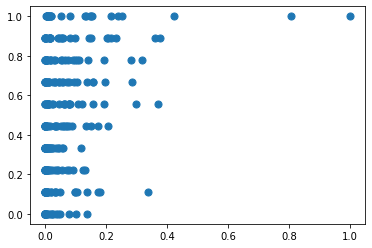

In [25]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],s=50)
plt.show()
colors=10*["g","r","c","b","k"]